# **Earthquake Prediction using AI-based Learning Agent**

# PART 1: DATA VERIFICATION & EXPLORATION

1. Earthquake Data Verification & Exploratory Analysis
2. Earthquake Prediction Project - Data Quality Assessment

1. Sections:
Import Libraries

* Import Libraries
* Load Dataset (100,000 rows)
* Column Verification
* Data Quality Checks
* Missing Values Analysis
* Value Range Validation
* Basic Statistics
* Date Analysis
* Magnitude Distribution
* Visualization Generation

EARTHQUAKE DATA VERIFICATION SCRIPT

ℹ Loading first 100000 rows for analysis...

✓ File loaded successfully!
✓ Total records loaded: 100000

COLUMN VERIFICATION

Expected columns: ['latitude', 'longitude', 'depth', 'mag', 'id', 'hour', 'date']
Actual columns:   ['latitude', 'longitude', 'depth', 'mag', 'id', 'hour', 'date']

✓ All required columns present!

DATA QUALITY CHECKS

1. Data Types:
latitude     float64
longitude    float64
depth        float64
mag          float64
id            object
hour           int64
date          object
dtype: object

2. Missing Values:
   ✓ No missing values!

3. Value Range Checks:
   ✓ latitude: All values in valid range [-90, 90]
   ✓ longitude: All values in valid range [-180, 180]
   ✓ depth: All values in valid range [0, 700]
   ✗ mag: 25 values out of range [0, 10]
   ✓ hour: All values in valid range [0, 23]

BASIC STATISTICS

            latitude      longitude          depth            mag           hour
count  100000.000000  100000.000000 

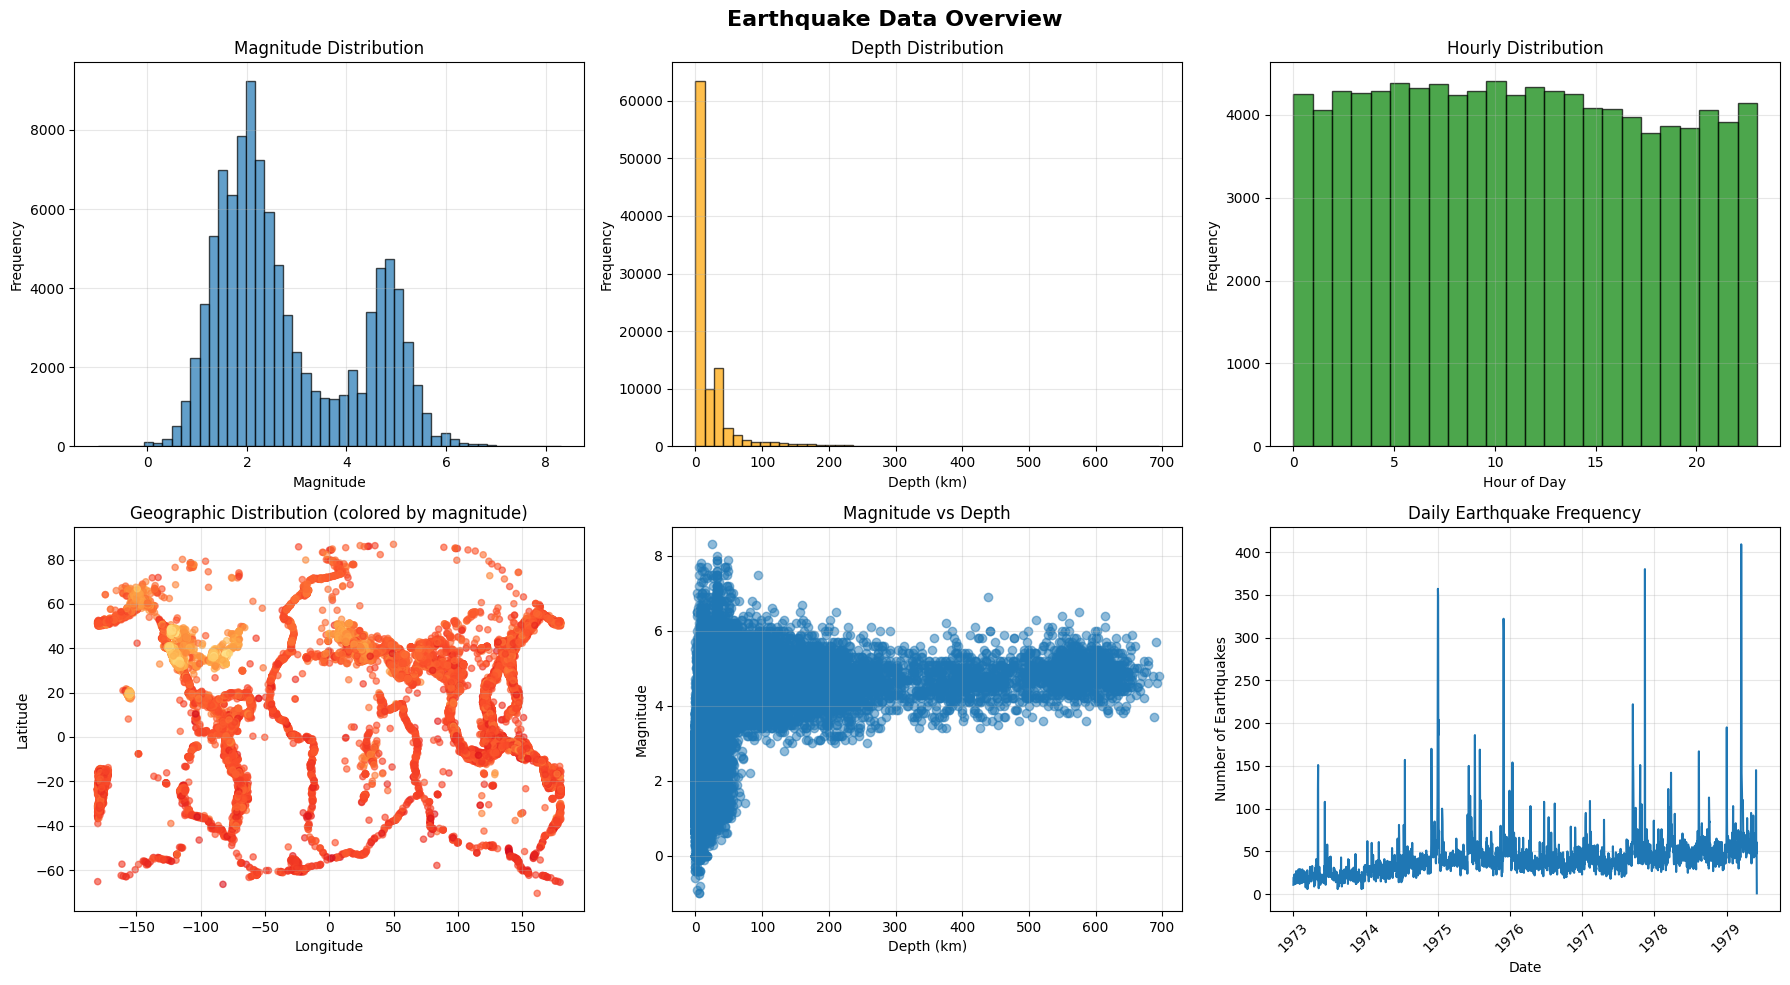

In [4]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ============================================================================
# STEP 1: VERIFY DATA LOADING
# ============================================================================

print("="*70)
print("EARTHQUAKE DATA VERIFICATION SCRIPT")
print("="*70)

# Load only first 100,000 rows
nrows = 100000
print(f"\nℹ Loading first {nrows} rows for analysis...")

try:
    df = pd.read_csv('earthquakes.csv', nrows=nrows)
    print("\n✓ File loaded successfully!")
    print(f"✓ Total records loaded: {len(df)}")
except FileNotFoundError:
    print("\n✗ ERROR: earthquakes.csv not found!")
    print("  Please ensure the file is in the same directory as this script.")
    exit(1)
except Exception as e:
    print(f"\n✗ ERROR loading file: {e}")
    exit(1)

# ============================================================================
# STEP 2: VERIFY REQUIRED COLUMNS
# ============================================================================

print("\n" + "="*70)
print("COLUMN VERIFICATION")
print("="*70)

required_columns = ['latitude', 'longitude', 'depth', 'mag', 'id', 'hour', 'date']
actual_columns = df.columns.tolist()

print(f"\nExpected columns: {required_columns}")
print(f"Actual columns:   {actual_columns}")

missing_columns = set(required_columns) - set(actual_columns)
extra_columns = set(actual_columns) - set(required_columns)

if missing_columns:
    print(f"\n✗ WARNING: Missing columns: {missing_columns}")
else:
    print("\n✓ All required columns present!")

if extra_columns:
    print(f"ℹ Extra columns found: {extra_columns}")

# ============================================================================
# STEP 3: DATA QUALITY CHECKS
# ============================================================================

print("\n" + "="*70)
print("DATA QUALITY CHECKS")
print("="*70)

# Check data types
print("\n1. Data Types:")
print(df.dtypes)

# Check for missing values
print("\n2. Missing Values:")
missing = df.isnull().sum()
if missing.sum() == 0:
    print("   ✓ No missing values!")
else:
    print(missing[missing > 0])
    print(f"\n   Total missing: {missing.sum()} values")

# Check value ranges
print("\n3. Value Range Checks:")

checks = {
    'latitude': (-90, 90),
    'longitude': (-180, 180),
    'depth': (0, 700),
    'mag': (0, 10),
    'hour': (0, 23)
}

issues_found = False
for col, (min_val, max_val) in checks.items():
    if col in df.columns:
        out_of_range = ((df[col] < min_val) | (df[col] > max_val)).sum()
        if out_of_range > 0:
            print(f"   ✗ {col}: {out_of_range} values out of range [{min_val}, {max_val}]")
            issues_found = True
        else:
            print(f"   ✓ {col}: All values in valid range [{min_val}, {max_val}]")

if not issues_found:
    print("\n   ✓ All values within expected ranges!")

# ============================================================================
# STEP 4: BASIC STATISTICS
# ============================================================================

print("\n" + "="*70)
print("BASIC STATISTICS")
print("="*70)

print("\n" + df.describe().to_string())

# ============================================================================
# STEP 5: DATE ANALYSIS
# ============================================================================

print("\n" + "="*70)
print("DATE ANALYSIS")
print("="*70)

try:
    df['date'] = pd.to_datetime(df['date'])
    print(f"\n✓ Date column converted successfully!")
    print(f"   Date range: {df['date'].min()} to {df['date'].max()}")
    print(f"   Time span: {(df['date'].max() - df['date'].min()).days} days")

    # Check date distribution by year
    df['year'] = df['date'].dt.year
    print(f"\n   Records per year:")
    year_counts = df['year'].value_counts().sort_index()
    for year, count in year_counts.items():
        print(f"   {year}: {count} earthquakes")

except Exception as e:
    print(f"\n✗ Error processing dates: {e}")

# ============================================================================
# STEP 6: MAGNITUDE DISTRIBUTION
# ============================================================================

print("\n" + "="*70)
print("MAGNITUDE DISTRIBUTION")
print("="*70)

if 'mag' in df.columns:
    print(f"\nMagnitude statistics:")
    print(f"   Min:    {df['mag'].min():.2f}")
    print(f"   Max:    {df['mag'].max():.2f}")
    print(f"   Mean:   {df['mag'].mean():.2f}")
    print(f"   Median: {df['mag'].median():.2f}")
    print(f"   Std:    {df['mag'].std():.2f}")

    # Magnitude categories
    print(f"\nMagnitude categories:")
    bins = [0, 3, 5, 7, 10]
    labels = ['Minor (<3)', 'Moderate (3-5)', 'Strong (5-7)', 'Major (>7)']
    df['mag_category'] = pd.cut(df['mag'], bins=bins, labels=labels)
    print(df['mag_category'].value_counts().sort_index())

# ============================================================================
# STEP 7: CREATE QUICK VISUALIZATIONS
# ============================================================================

print("\n" + "="*70)
print("GENERATING QUICK VISUALIZATIONS")
print("="*70)

try:
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    fig.suptitle('Earthquake Data Overview', fontsize=16, fontweight='bold')

    # 1. Magnitude distribution
    axes[0, 0].hist(df['mag'], bins=50, edgecolor='black', alpha=0.7)
    axes[0, 0].set_xlabel('Magnitude')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].set_title('Magnitude Distribution')
    axes[0, 0].grid(True, alpha=0.3)

    # 2. Depth distribution
    axes[0, 1].hist(df['depth'], bins=50, edgecolor='black', alpha=0.7, color='orange')
    axes[0, 1].set_xlabel('Depth (km)')
    axes[0, 1].set_ylabel('Frequency')
    axes[0, 1].set_title('Depth Distribution')
    axes[0, 1].grid(True, alpha=0.3)

    # 3. Hourly distribution
    axes[0, 2].hist(df['hour'], bins=24, edgecolor='black', alpha=0.7, color='green')
    axes[0, 2].set_xlabel('Hour of Day')
    axes[0, 2].set_ylabel('Frequency')
    axes[0, 2].set_title('Hourly Distribution')
    axes[0, 2].grid(True, alpha=0.3)

    # 4. Geographic scatter
    axes[1, 0].scatter(df['longitude'], df['latitude'],
                      c=df['mag'], cmap='YlOrRd', alpha=0.6, s=20)
    axes[1, 0].set_xlabel('Longitude')
    axes[1, 0].set_ylabel('Latitude')
    axes[1, 0].set_title('Geographic Distribution (colored by magnitude)')
    axes[1, 0].grid(True, alpha=0.3)

    # 5. Magnitude vs Depth
    axes[1, 1].scatter(df['depth'], df['mag'], alpha=0.5)
    axes[1, 1].set_xlabel('Depth (km)')
    axes[1, 1].set_ylabel('Magnitude')
    axes[1, 1].set_title('Magnitude vs Depth')
    axes[1, 1].grid(True, alpha=0.3)

    # 6. Time series
    if 'date' in df.columns:
        daily_counts = df.groupby(df['date'].dt.date).size()
        axes[1, 2].plot(daily_counts.index, daily_counts.values)
        axes[1, 2].set_xlabel('Date')
        axes[1, 2].set_ylabel('Number of Earthquakes')
        axes[1, 2].set_title('Daily Earthquake Frequency')
        axes[1, 2].grid(True, alpha=0.3)
        axes[1, 2].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.savefig('data_overview.png', dpi=300, bbox_inches='tight')
    print("\n✓ Visualizations saved as 'data_overview.png'")

except Exception as e:
    print(f"\n✗ Error creating visualizations: {e}")

# ============================================================================
# STEP 8: DATA READINESS ASSESSMENT
# ============================================================================

print("\n" + "="*70)
print("DATA READINESS ASSESSMENT")
print("="*70)

readiness_score = 0
total_checks = 5

# Check 1: All required columns present
if not missing_columns:
    readiness_score += 1
    print("\n✓ Column structure: PASS")
else:
    print("\n✗ Column structure: FAIL")

# Check 2: Reasonable data size
if len(df) >= 1000:
    readiness_score += 1
    print("✓ Data size: PASS (sufficient for training)")
else:
    print(f"⚠ Data size: WARNING (only {len(df)} records, recommend >1000)")

# Check 3: Missing values
if missing.sum() / len(df) < 0.05:  # Less than 5% missing
    readiness_score += 1
    print("✓ Data completeness: PASS")
else:
    print("⚠ Data completeness: WARNING (>5% missing values)")

# Check 4: Value ranges
if not issues_found:
    readiness_score += 1
    print("✓ Value ranges: PASS")
else:
    print("✗ Value ranges: FAIL (some values out of expected range)")

# Check 5: Date parsing
try:
    df['date'] = pd.to_datetime(df['date'])
    readiness_score += 1
    print("✓ Date format: PASS")
except:
    print("✗ Date format: FAIL")

print("\n" + "="*70)
print(f"OVERALL READINESS SCORE: {readiness_score}/{total_checks} ({readiness_score/total_checks*100:.0f}%)")
print("="*70)

if readiness_score >= 4:
    print("\n✓ Dataset is READY for model training!")
    print("\n  Next steps:")
    print("  1. Run the complete pipeline (main code)")
    print("  2. Start with data cleaning and feature engineering")
    print("  3. Train baseline models (Random Forest, LSTM, Prophet)")
elif readiness_score >= 3:
    print("\n⚠ Dataset needs MINOR FIXES before training")
    print("  Review warnings above and fix identified issues")
else:
    print("\n✗ Dataset needs MAJOR FIXES before training")
    print("  Address the failed checks before proceeding")

# ============================================================================
# STEP 9: SAMPLE DATA PREVIEW
# ============================================================================

print("\n" + "="*70)
print("SAMPLE DATA PREVIEW (First 10 rows)")
print("="*70)
print("\n" + df.head(10).to_string())

print("\n" + "="*70)
print("VERIFICATION COMPLETE!")
print("="*70)

# Save cleaned preview
print("\nℹ Saving first 100 rows as sample for testing...")
df.head(100).to_csv('earthquakes_sample.csv', index=False)
print("✓ Sample saved as 'earthquakes_sample.csv'")

# PART 2: LEARNING AGENT WITH SEARCH ALGORITHM

This section implements a complete learning agent with four components: Learning Element (learns from historical data), Performance Element (searches and predicts using K-Nearest Situations algorithm), Critic (evaluates predictions), and Problem Generator (suggests improvements). The agent predicts the probability of a magnitude 4+ earthquake occurring in the next 7 days by finding similar historical situations and using weighted voting.

**Agent Components:**
1. **Learning Element:** Analyzes historical earthquake sequences
2. **Performance Element:** Searches for similar seismic contexts using pattern matching
3. **Critic:** Evaluates prediction accuracy (precision, recall, accuracy)
4. **Problem Generator:** Suggests parameter improvements

**Search Algorithm:** K-Nearest Situations Pattern Matching
- Extracts current seismic context (30-day activity, magnitudes, trends)
- Searches historical data for similar contexts
- Checks outcomes (what happened in next 7 days)
- Calculates probability through weighted voting

**Expected Output:**
- Agent predictions on test cases
- Performance metrics (accuracy, precision, recall)
- Improvement suggestions
- Console output showing search process



In [5]:


import pandas as pd
import numpy as np
from datetime import timedelta
import heapq

# ============================================================================
# LEARNING AGENT WITH SEARCH FOR PROBABILITY PREDICTION
# ============================================================================

class EarthquakeProbabilityAgent:

    def __init__(self, window_days=7, magnitude_threshold=4.0, region_size=2.0):
        self.historical_data = None
        self.window_days = window_days
        self.magnitude_threshold = magnitude_threshold
        self.region_size = region_size
        self.performance_log = []

    def load_historical_data(self, df):
        """Learning Element: Learn from historical earthquake patterns"""
        print("="*70)
        print("LEARNING ELEMENT: Loading Historical Earthquake Data")
        print("="*70)

        df['date'] = pd.to_datetime(df['date'])
        df = df.sort_values('date').reset_index(drop=True)
        self.historical_data = df.copy()

        print(f"\n✓ Loaded {len(df)} historical earthquakes")
        print(f"✓ Date range: {df['date'].min()} to {df['date'].max()}")

        # Analyze historical patterns
        significant = df[df['mag'] >= self.magnitude_threshold]
        print(f"✓ Significant earthquakes (mag >= {self.magnitude_threshold}): {len(significant)}")

        # Calculate base rate (prior probability)
        self.base_rate = len(significant) / len(df)
        print(f"✓ Base rate (prior probability): {self.base_rate:.4f}")

    def get_regional_context(self, lat, lon, current_date, days_back=30):
        """
        Extract regional seismic context for a location
        Returns recent earthquake activity in the region
        """
        date_threshold = current_date - timedelta(days=days_back)

        regional_data = self.historical_data[
            (self.historical_data['date'] >= date_threshold) &
            (self.historical_data['date'] < current_date) &
            (abs(self.historical_data['latitude'] - lat) <= self.region_size) &
            (abs(self.historical_data['longitude'] - lon) <= self.region_size)
        ]

        if len(regional_data) == 0:
            return None

        # Calculate context features
        context = {
            'eq_count': len(regional_data),
            'avg_mag': regional_data['mag'].mean(),
            'max_mag': regional_data['mag'].max(),
            'count_significant': (regional_data['mag'] >= self.magnitude_threshold).sum(),
            'avg_depth': regional_data['depth'].mean(),
            'recent_trend': self.calculate_trend(regional_data)
        }

        return context

    def calculate_trend(self, data):
        """Calculate if seismic activity is increasing or decreasing"""
        if len(data) < 2:
            return 0

        # Compare first half vs second half
        mid = len(data) // 2
        first_half_avg = data.iloc[:mid]['mag'].mean()
        second_half_avg = data.iloc[mid:]['mag'].mean()

        return second_half_avg - first_half_avg

    def calculate_context_similarity(self, context1, context2):
        """
        Calculate similarity between two seismic contexts
        Lower score = more similar
        """
        if context1 is None or context2 is None:
            return float('inf')

        # Weighted similarity
        similarities = [
            abs(context1['eq_count'] - context2['eq_count']) / 100.0,  # Normalize
            abs(context1['avg_mag'] - context2['avg_mag']) / 5.0,
            abs(context1['max_mag'] - context2['max_mag']) / 5.0,
            abs(context1['count_significant'] - context2['count_significant']) / 10.0,
            abs(context1['recent_trend'] - context2['recent_trend']) / 2.0
        ]

        return sum(similarities) / len(similarities)

    def search_similar_situations(self, query_lat, query_lon, query_date, k=50):

        print("\n" + "="*70)
        print("PERFORMANCE ELEMENT: Searching Similar Historical Situations")
        print("="*70)
        print(f"\nQuery:")
        print(f"  Location: ({query_lat:.2f}°, {query_lon:.2f}°)")
        print(f"  Date: {query_date}")
        print(f"  Searching for {k} similar situations...")

        # Get context for query location
        query_context = self.get_regional_context(query_lat, query_lon, query_date)

        if query_context is None:
            print("  ⚠ No recent activity in query region")
            return []

        print(f"\n  Query Context:")
        print(f"    - Recent earthquakes (30d): {query_context['eq_count']}")
        print(f"    - Average magnitude: {query_context['avg_mag']:.2f}")
        print(f"    - Significant earthquakes: {query_context['count_significant']}")

        # Search through historical data
        similar_situations = []

        # Sample dates to search (every 7 days to avoid overlap)
        search_dates = pd.date_range(
            self.historical_data['date'].min(),
            query_date - timedelta(days=self.window_days),
            freq='7D'
        )

        for search_date in search_dates:
            # Get context at this historical point
            historical_context = self.get_regional_context(
                query_lat, query_lon, search_date
            )

            if historical_context is None:
                continue

            # Calculate similarity
            similarity_score = self.calculate_context_similarity(
                query_context, historical_context
            )

            # Check what happened in next 7 days
            future_start = search_date
            future_end = search_date + timedelta(days=self.window_days)

            future_earthquakes = self.historical_data[
                (self.historical_data['date'] > future_start) &
                (self.historical_data['date'] <= future_end) &
                (abs(self.historical_data['latitude'] - query_lat) <= self.region_size) &
                (abs(self.historical_data['longitude'] - query_lon) <= self.region_size)
            ]

            # Did significant earthquake occur?
            significant_occurred = (future_earthquakes['mag'] >= self.magnitude_threshold).any()

            situation = {
                'date': search_date,
                'similarity_score': similarity_score,
                'context': historical_context,
                'outcome': 1 if significant_occurred else 0,
                'future_eq_count': len(future_earthquakes),
                'max_future_mag': future_earthquakes['mag'].max() if len(future_earthquakes) > 0 else 0
            }

            similar_situations.append(situation)

        # Sort by similarity and get top k
        similar_situations.sort(key=lambda x: x['similarity_score'])
        top_k = similar_situations[:k]

        print(f"\n✓ Found {len(top_k)} similar situations")

        return top_k

    def predict_probability(self, query_lat, query_lon, query_date, k=50):

        print("\n" + "="*70)
        print("MAKING PREDICTION")
        print("="*70)

        # Search for similar situations
        similar_situations = self.search_similar_situations(
            query_lat, query_lon, query_date, k
        )

        if len(similar_situations) == 0:
            print("⚠ No similar situations found, using base rate")
            return self.base_rate, 0.0

        # Weighted voting
        weights = []
        outcomes = []

        for situation in similar_situations:
            # Convert similarity score to weight (inverse)
            weight = 1.0 / (situation['similarity_score'] + 0.01)
            weights.append(weight)
            outcomes.append(situation['outcome'])

        # Normalize weights
        weights = np.array(weights)
        weights = weights / weights.sum()

        # Calculate weighted probability
        probability = np.sum(weights * np.array(outcomes))

        # Calculate confidence based on consistency
        outcomes_array = np.array(outcomes)
        consistency = 1.0 - outcomes_array.std()
        confidence = consistency * min(len(similar_situations) / k, 1.0)

        print(f"\n✓ Prediction Results:")
        print(f"  - Probability: {probability:.1%}")
        print(f"  - Confidence: {confidence:.1%}")
        print(f"  - Similar situations analyzed: {len(similar_situations)}")
        print(f"  - Positive outcomes: {sum(outcomes)} ({sum(outcomes)/len(outcomes)*100:.1f}%)")

        return probability, confidence

    def evaluate_prediction(self, probability, actual_outcome, threshold=0.5):
        """Critic: Evaluate prediction accuracy"""
        prediction = 1 if probability >= threshold else 0
        correct = (prediction == actual_outcome)

        evaluation = {
            'probability': probability,
            'prediction': prediction,
            'actual': actual_outcome,
            'correct': correct,
            'threshold': threshold
        }

        self.performance_log.append(evaluation)

        return evaluation

    def generate_improvement_suggestions(self):
        """Problem Generator: Analyze performance and suggest improvements"""
        print("\n" + "="*70)
        print("PROBLEM GENERATOR: Performance Analysis & Suggestions")
        print("="*70)

        if len(self.performance_log) == 0:
            return ["No predictions made yet"]

        # Calculate metrics
        correct = sum(1 for p in self.performance_log if p['correct'])
        accuracy = correct / len(self.performance_log)

        # Calculate precision and recall
        tp = sum(1 for p in self.performance_log if p['prediction'] == 1 and p['actual'] == 1)
        fp = sum(1 for p in self.performance_log if p['prediction'] == 1 and p['actual'] == 0)
        fn = sum(1 for p in self.performance_log if p['prediction'] == 0 and p['actual'] == 1)

        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0

        print(f"\nPerformance Summary:")
        print(f"  Total predictions: {len(self.performance_log)}")
        print(f"  Accuracy: {accuracy:.2%}")
        print(f"  Precision: {precision:.2%}")
        print(f"  Recall: {recall:.2%}")

        # Generate suggestions
        suggestions = []

        if accuracy < 0.7:
            suggestions.append(
                f"Low accuracy ({accuracy:.2%}): Try increasing k (more neighbors) "
                f"or adjusting region_size parameter"
            )

        if precision < 0.5:
            suggestions.append(
                f"Low precision ({precision:.2%}): Too many false alarms. "
                f"Increase prediction threshold or refine similarity calculation"
            )

        if recall < 0.5:
            suggestions.append(
                f"Low recall ({recall:.2%}): Missing too many earthquakes. "
                f"Decrease prediction threshold or expand search region"
            )

        if accuracy >= 0.7 and precision >= 0.6 and recall >= 0.6:
            suggestions.append(
                "Good performance! Consider fine-tuning parameters for optimal balance"
            )

        return suggestions

# ============================================================================
# WORKING EXAMPLE
# ============================================================================

def working_example():
    """Complete working example with earthquake probability prediction"""

    print("\n" + "="*70)
    print("WORKING EXAMPLE: 7-Day Earthquake Probability Prediction")
    print("="*70)

    # Load data
    print("\n[STEP 1] Loading data...")
    try:
        df = pd.read_csv('earthquakes.csv', nrows=100000)
        print(f"✓ Loaded {len(df)} earthquakes")
    except FileNotFoundError:
        print("✗ earthquakes.csv not found. Creating sample data...")
        # Create sample data
        np.random.seed(42)
        dates = pd.date_range('2020-01-01', '2024-01-01', periods=5000)
        df = pd.DataFrame({
            'latitude': np.random.uniform(30, 40, 5000),
            'longitude': np.random.uniform(135, 145, 5000),
            'depth': np.random.uniform(5, 50, 5000),
            'mag': np.random.exponential(2.5, 5000),  # Realistic magnitude distribution
            'id': [f'eq_{i}' for i in range(5000)],
            'hour': np.random.randint(0, 24, 5000),
            'date': dates
        })
        df['mag'] = df['mag'].clip(0, 8)
        print(f"✓ Created sample data with {len(df)} earthquakes")

    # Initialize agent
    print("\n[STEP 2] Initializing Agent...")
    agent = EarthquakeProbabilityAgent(
        window_days=7,
        magnitude_threshold=4.0,
        region_size=2.0
    )
    agent.load_historical_data(df)

    # Select test cases
    print("\n[STEP 3] Selecting Test Cases...")
    test_date = df['date'].max() - timedelta(days=30)
    test_region = df[df['date'] < test_date].sample(5)

    print(f"\nTesting on 5 different locations/times")

    # Test predictions
    print("\n[STEP 4] Making Predictions...")

    for idx, row in test_region.iterrows():
        print("\n" + "="*70)
        print(f"TEST CASE {idx + 1}")
        print("="*70)

        query_lat = row['latitude']
        query_lon = row['longitude']
        query_date = row['date']

        # Make prediction
        probability, confidence = agent.predict_probability(
            query_lat, query_lon, query_date, k=30
        )

        # Check actual outcome
        future_end = query_date + timedelta(days=7)
        future_earthquakes = df[
            (df['date'] > query_date) &
            (df['date'] <= future_end) &
            (abs(df['latitude'] - query_lat) <= 2.0) &
            (abs(df['longitude'] - query_lon) <= 2.0)
        ]

        actual_outcome = 1 if (future_earthquakes['mag'] >= 4.0).any() else 0

        # Evaluate
        evaluation = agent.evaluate_prediction(probability, actual_outcome)

        print(f"\n📊 Evaluation:")
        print(f"  Predicted probability: {probability:.1%}")
        print(f"  Prediction: {'EARTHQUAKE LIKELY' if probability >= 0.5 else 'NO EARTHQUAKE'}")
        print(f"  Actual outcome: {'EARTHQUAKE OCCURRED' if actual_outcome == 1 else 'NO EARTHQUAKE'}")
        print(f"  Result: {'✓ CORRECT' if evaluation['correct'] else '✗ INCORRECT'}")

        if len(future_earthquakes) > 0:
            print(f"  Future earthquakes in region: {len(future_earthquakes)}")
            print(f"  Max magnitude: {future_earthquakes['mag'].max():.2f}")

    # Generate suggestions
    print("\n[STEP 5] Generating Improvement Suggestions...")
    suggestions = agent.generate_improvement_suggestions()

    for i, suggestion in enumerate(suggestions, 1):
        print(f"\n  {i}. {suggestion}")

    print("\n" + "="*70)
    print("WORKING EXAMPLE COMPLETED!")
    print("="*70)

    return agent

# ============================================================================
# ALGORITHM COMPLEXITY
# ============================================================================

def complexity_analysis():
    """Analyze algorithm complexity"""
    print("\n" + "="*70)
    print("ALGORITHM COMPLEXITY ANALYSIS")
    print("="*70)

    print("\nTime Complexity:")
    print("  Similarity Search: O(T * n)")
    print("    where T = number of time points to search")
    print("          n = regional earthquake count")
    print("  Overall prediction: O(T * n * log k)")
    print("    with priority queue optimization")

    print("\nSpace Complexity:")
    print("  Historical Data: O(N)")
    print("    where N = total earthquakes")
    print("  Search Results: O(k)")
    print("    where k = number of neighbors")

    print("\nOptimizations:")
    print("  1. Spatial indexing (KD-tree) for regional queries")
    print("  2. Temporal sampling (every 7 days instead of daily)")
    print("  3. Caching of regional contexts")
    print("  4. Parallel processing of test cases")

# ============================================================================
# MAIN
# ============================================================================

if __name__ == "__main__":
    agent = working_example()
    complexity_analysis()

    print("\n" + "="*70)
    print("="*70)


WORKING EXAMPLE: 7-Day Earthquake Probability Prediction

[STEP 1] Loading data...
✓ Loaded 100000 earthquakes

[STEP 2] Initializing Agent...
LEARNING ELEMENT: Loading Historical Earthquake Data

✓ Loaded 100000 historical earthquakes
✓ Date range: 1973-01-01 00:00:00 to 1979-06-03 00:00:00
✓ Significant earthquakes (mag >= 4.0): 26624
✓ Base rate (prior probability): 0.2662

[STEP 3] Selecting Test Cases...

Testing on 5 different locations/times

[STEP 4] Making Predictions...

TEST CASE 69115

MAKING PREDICTION

PERFORMANCE ELEMENT: Searching Similar Historical Situations

Query:
  Location: (-17.54°, -178.92°)
  Date: 1977-11-12 00:00:00
  Searching for 30 similar situations...

  Query Context:
    - Recent earthquakes (30d): 10
    - Average magnitude: 5.01
    - Significant earthquakes: 10

✓ Found 30 similar situations

✓ Prediction Results:
  - Probability: 74.3%
  - Confidence: 54.2%
  - Similar situations analyzed: 30
  - Positive outcomes: 21 (70.0%)

📊 Evaluation:
  Pred

# PART 3: DATA PREPROCESSING & ML CLASSIFICATION MODELS

This section transforms earthquake prediction into a binary classification problem. For each earthquake location and time, we create a prediction sample asking "Will a magnitude 4+ earthquake occur within 2° of this location in the next 7 days?" The pipeline includes creating prediction windows, engineering 23 predictive features from historical patterns, training two classification models (Random Forest and Logistic Regression), and evaluating performance using ROC-AUC, precision, recall, and F1-score.

**Pipeline Steps:**
1. **Data Transformation:** Create 7-day prediction windows with binary targets
2. **Feature Engineering:** Generate 23 features from temporal, spatial, and historical patterns
3. **Model Training:** Train Random Forest and Logistic Regression classifiers
4. **Evaluation:** Assess models using classification metrics
5. **Visualization:** Generate ROC curves, precision-recall curves, and confusion matrices

**Features Engineered (23 total):**
- Temporal: month, day_of_week, day_of_year, hour
- Spatial: latitude, longitude, depth, current magnitude
- Historical (30-day): earthquake count, avg/max/std magnitude, counts by magnitude ranges
- Recent (7-day): earthquake count, avg/max magnitude, significant earthquake count
- Patterns: days since last significant earthquake, magnitude trend, cumulative seismic energy

**Models Trained:**
1. **Random Forest Classifier** - Ensemble tree-based model with class balancing
2. **Logistic Regression** - Linear model for baseline comparison

**Evaluation Metrics:**
- Accuracy, Precision, Recall, F1-Score, ROC-AUC
- Confusion Matrix
- Feature Importance Rankings
- Probability-based risk categories (Low/Moderate/High)

**Expected Output:**
- Model performance metrics for both models
- `classification_evaluation.png` (4 visualization plots)
- Feature importance analysis
- Prediction examples with probabilities

EARTHQUAKE PROBABILITY PREDICTION SYSTEM
Task: Predict probability of magnitude 4+ earthquake in next 7 days
LOADING EARTHQUAKE DATA

✓ Loaded 100000 earthquakes
✓ Date range: 1973-01-01 00:00:00 to 1979-06-03 00:00:00
✓ Magnitude range: -1.00 to 8.31

✓ Earthquakes with magnitude >= 4.0: 26624 (26.6%)

CREATING PREDICTION WINDOWS

Parameters:
  - Prediction window: 7 days ahead
  - Magnitude threshold: 4.0+
  - Region size: ±2.0 degrees
  Processed 10000/100000 earthquakes...
  Processed 20000/100000 earthquakes...
  Processed 30000/100000 earthquakes...
  Processed 40000/100000 earthquakes...
  Processed 50000/100000 earthquakes...
  Processed 60000/100000 earthquakes...
  Processed 70000/100000 earthquakes...
  Processed 80000/100000 earthquakes...
  Processed 90000/100000 earthquakes...

✓ Created 99999 prediction samples
  - Positive samples (earthquake occurred): 31266 (31.3%)
  - Negative samples (no earthquake): 68733 (68.7%)

FEATURE ENGINEERING FOR PREDICTION
  Engineered fea

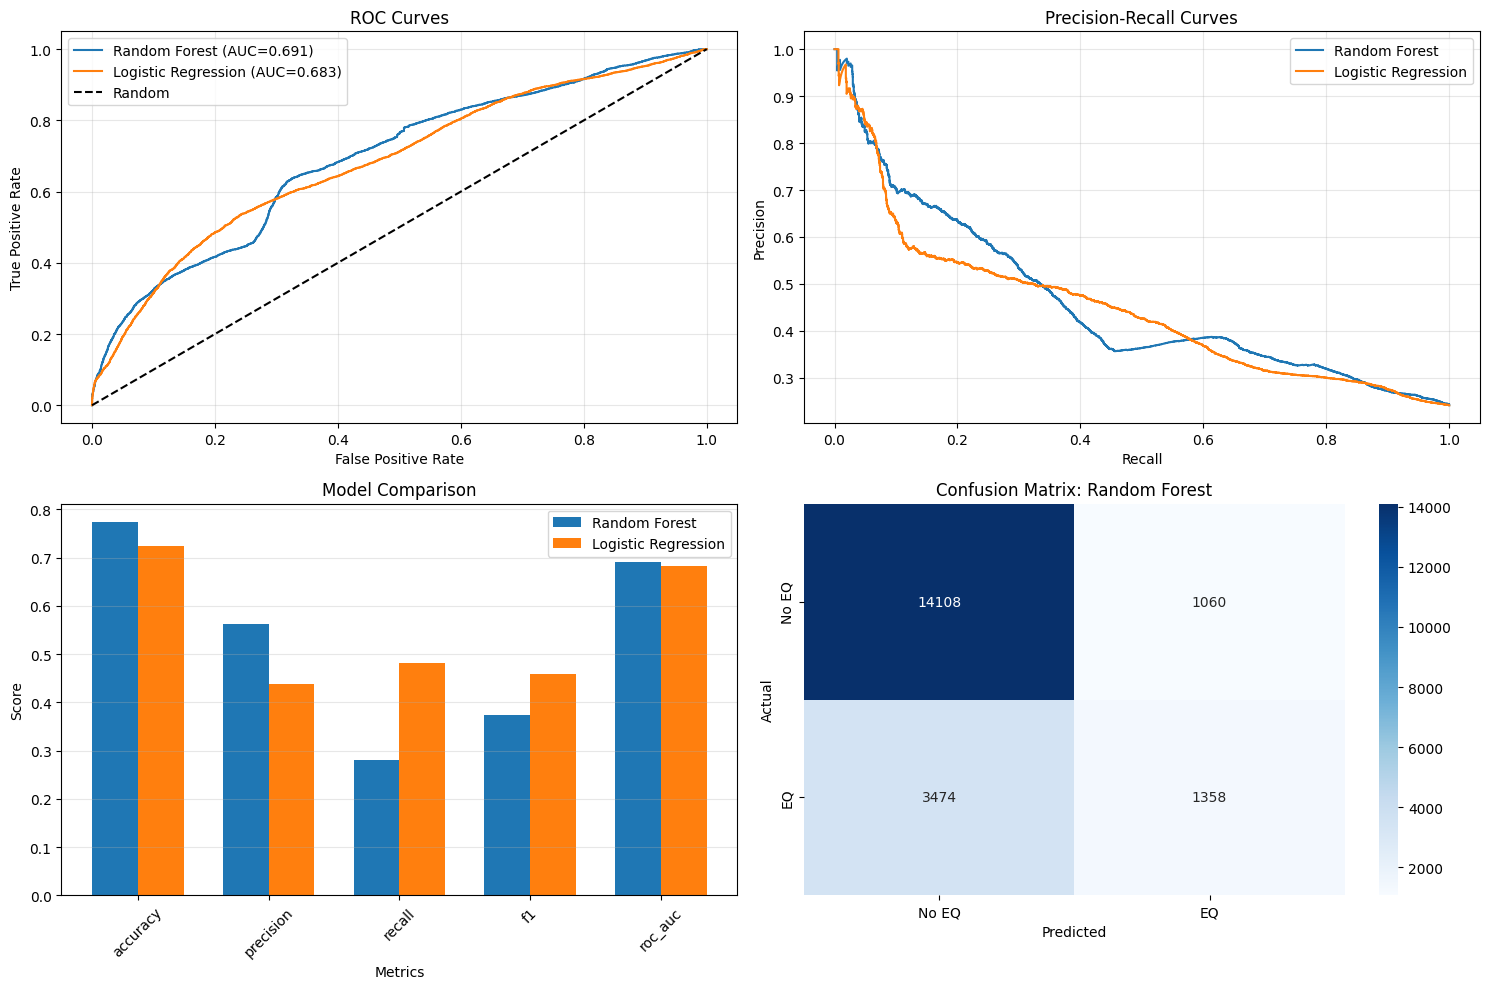

In [6]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (classification_report, confusion_matrix,
                            roc_auc_score, roc_curve, precision_recall_curve,
                            accuracy_score, precision_score, recall_score, f1_score)
import warnings
warnings.filterwarnings('ignore')

# ============================================================================
# PART 1: DATA LOADING AND EXPLORATION
# ============================================================================

def load_data(filepath='earthquakes.csv', nrows=100000):
    """Load earthquake data"""
    print("="*70)
    print("LOADING EARTHQUAKE DATA")
    print("="*70)

    df = pd.read_csv(filepath, nrows=nrows)
    df['date'] = pd.to_datetime(df['date'])
    df = df.sort_values('date').reset_index(drop=True)

    print(f"\n✓ Loaded {len(df)} earthquakes")
    print(f"✓ Date range: {df['date'].min()} to {df['date'].max()}")
    print(f"✓ Magnitude range: {df['mag'].min():.2f} to {df['mag'].max():.2f}")

    # Distribution of magnitudes
    mag_4_plus = (df['mag'] >= 4.0).sum()
    print(f"\n✓ Earthquakes with magnitude >= 4.0: {mag_4_plus} ({mag_4_plus/len(df)*100:.1f}%)")

    return df

# ============================================================================
# PART 2: CREATE PREDICTION WINDOWS
# ============================================================================

def create_prediction_windows(df, window_days=7, magnitude_threshold=4.0, region_size=2.0):
    """
    Create training samples with prediction windows

    For each earthquake, create a sample asking:
    "Will there be a magnitude 4+ earthquake in the next 7 days within 2 degrees?"

    Parameters:
    - window_days: Look ahead window (default: 7 days)
    - magnitude_threshold: Minimum magnitude to predict (default: 4.0)
    - region_size: Radius in degrees for "same region" (default: 2.0)
    """
    print("\n" + "="*70)
    print("CREATING PREDICTION WINDOWS")
    print("="*70)
    print(f"\nParameters:")
    print(f"  - Prediction window: {window_days} days ahead")
    print(f"  - Magnitude threshold: {magnitude_threshold}+")
    print(f"  - Region size: ±{region_size} degrees")

    samples = []

    # Process each earthquake as a potential prediction point
    for idx in range(len(df) - 1):
        current_eq = df.iloc[idx]
        current_date = current_eq['date']
        current_lat = current_eq['latitude']
        current_lon = current_eq['longitude']

        # Define the prediction window
        window_end = current_date + timedelta(days=window_days)

        # Find all earthquakes in the next 7 days in the same region
        future_earthquakes = df[
            (df['date'] > current_date) &
            (df['date'] <= window_end) &
            (abs(df['latitude'] - current_lat) <= region_size) &
            (abs(df['longitude'] - current_lon) <= region_size)
        ]

        # Check if any significant earthquake (mag >= threshold) occurred
        significant_eq = future_earthquakes[future_earthquakes['mag'] >= magnitude_threshold]

        # Binary target: 1 if significant earthquake occurred, 0 otherwise
        target = 1 if len(significant_eq) > 0 else 0

        # Store sample
        sample = {
            'current_idx': idx,
            'current_date': current_date,
            'latitude': current_lat,
            'longitude': current_lon,
            'depth': current_eq['depth'],
            'mag': current_eq['mag'],
            'hour': current_eq['hour'],
            'target': target,
            'future_eq_count': len(future_earthquakes),
            'max_future_mag': future_earthquakes['mag'].max() if len(future_earthquakes) > 0 else 0
        }

        samples.append(sample)

        # Progress indicator
        if (idx + 1) % 10000 == 0:
            print(f"  Processed {idx + 1}/{len(df)} earthquakes...")

    samples_df = pd.DataFrame(samples)

    # Statistics
    positive_samples = samples_df['target'].sum()
    negative_samples = len(samples_df) - positive_samples

    print(f"\n✓ Created {len(samples_df)} prediction samples")
    print(f"  - Positive samples (earthquake occurred): {positive_samples} ({positive_samples/len(samples_df)*100:.1f}%)")
    print(f"  - Negative samples (no earthquake): {negative_samples} ({negative_samples/len(samples_df)*100:.1f}%)")

    return samples_df

# ============================================================================
# PART 3: FEATURE ENGINEERING FOR PREDICTION
# ============================================================================

def engineer_prediction_features(samples_df, df_full):
    """
    Create features that capture seismic activity BEFORE the prediction point
    These are the signals we use to predict future earthquakes
    """
    print("\n" + "="*70)
    print("FEATURE ENGINEERING FOR PREDICTION")
    print("="*70)

    # Sort by date
    df_full = df_full.sort_values('date').reset_index(drop=True)

    features_list = []

    for idx, row in samples_df.iterrows():
        current_idx = row['current_idx']
        current_date = row['current_date']
        current_lat = row['latitude']
        current_lon = row['longitude']

        # Get historical earthquakes (before current date)
        historical = df_full[df_full['date'] < current_date].tail(1000)  # Last 1000 events

        # Regional historical earthquakes (within 5 degrees)
        regional = historical[
            (abs(historical['latitude'] - current_lat) <= 5.0) &
            (abs(historical['longitude'] - current_lon) <= 5.0)
        ]

        # Recent activity (last 30 days)
        date_30d_ago = current_date - timedelta(days=30)
        recent = regional[regional['date'] >= date_30d_ago]

        # Recent activity (last 7 days)
        date_7d_ago = current_date - timedelta(days=7)
        very_recent = regional[regional['date'] >= date_7d_ago]

        # === TEMPORAL FEATURES ===
        features = {
            'month': current_date.month,
            'day_of_week': current_date.dayofweek,
            'day_of_year': current_date.dayofyear,
            'hour': row['hour'],
        }

        # === SPATIAL FEATURES ===
        features['latitude'] = current_lat
        features['longitude'] = current_lon
        features['depth'] = row['depth']
        features['current_mag'] = row['mag']

        # === HISTORICAL ACTIVITY FEATURES (Last 30 days) ===
        features['eq_count_30d'] = len(recent)
        features['avg_mag_30d'] = recent['mag'].mean() if len(recent) > 0 else 0
        features['max_mag_30d'] = recent['mag'].max() if len(recent) > 0 else 0
        features['std_mag_30d'] = recent['mag'].std() if len(recent) > 0 else 0
        features['avg_depth_30d'] = recent['depth'].mean() if len(recent) > 0 else 0

        # Count by magnitude categories (last 30 days)
        features['count_mag_2to3_30d'] = ((recent['mag'] >= 2) & (recent['mag'] < 3)).sum()
        features['count_mag_3to4_30d'] = ((recent['mag'] >= 3) & (recent['mag'] < 4)).sum()
        features['count_mag_4plus_30d'] = (recent['mag'] >= 4).sum()

        # === RECENT ACTIVITY FEATURES (Last 7 days) ===
        features['eq_count_7d'] = len(very_recent)
        features['avg_mag_7d'] = very_recent['mag'].mean() if len(very_recent) > 0 else 0
        features['max_mag_7d'] = very_recent['mag'].max() if len(very_recent) > 0 else 0
        features['count_mag_4plus_7d'] = (very_recent['mag'] >= 4).sum()

        # === TEMPORAL PATTERNS ===
        # Days since last significant earthquake (mag >= 4)
        significant_historical = regional[regional['mag'] >= 4.0]
        if len(significant_historical) > 0:
            last_significant = significant_historical.iloc[-1]['date']
            features['days_since_last_sig'] = (current_date - last_significant).days
        else:
            features['days_since_last_sig'] = 9999  # No recent significant earthquake

        # Trend: Is activity increasing?
        if len(recent) >= 2:
            features['mag_trend'] = recent['mag'].iloc[-5:].mean() - recent['mag'].iloc[:5].mean()
        else:
            features['mag_trend'] = 0

        # === SEISMIC ENERGY ===
        # Cumulative seismic energy (last 30 days)
        if len(recent) > 0:
            energy = (10 ** (1.5 * recent['mag'])).sum()
            features['cumulative_energy_30d'] = np.log10(energy + 1)
        else:
            features['cumulative_energy_30d'] = 0

        features_list.append(features)

        if (idx + 1) % 10000 == 0:
            print(f"  Engineered features for {idx + 1}/{len(samples_df)} samples...")

    features_df = pd.DataFrame(features_list)

    print(f"\n✓ Created {len(features_df.columns)} features")
    print(f"\nFeature categories:")
    print(f"  - Temporal: month, day_of_week, day_of_year, hour")
    print(f"  - Spatial: latitude, longitude, depth")
    print(f"  - Historical (30d): count, avg, max, std magnitude")
    print(f"  - Recent (7d): count, avg, max magnitude")
    print(f"  - Patterns: days since last sig, trend, energy")

    return features_df

# ============================================================================
# PART 4: PREPARE DATA FOR CLASSIFICATION
# ============================================================================

def prepare_classification_data(features_df, samples_df):
    """Prepare features and target for classification"""
    print("\n" + "="*70)
    print("PREPARING DATA FOR CLASSIFICATION")
    print("="*70)

    # Combine features with target
    X = features_df.copy()
    y = samples_df['target'].values

    # Handle missing values
    X = X.fillna(0)

    # Remove any infinite values
    X = X.replace([np.inf, -np.inf], 0)

    print(f"\nDataset shape: {X.shape}")
    print(f"Number of features: {X.shape[1]}")
    print(f"Number of samples: {X.shape[0]}")

    # Class distribution
    print(f"\nTarget distribution:")
    print(f"  Class 0 (No earthquake): {(y == 0).sum()} ({(y == 0).sum()/len(y)*100:.1f}%)")
    print(f"  Class 1 (Earthquake): {(y == 1).sum()} ({(y == 1).sum()/len(y)*100:.1f}%)")

    # Train-test split (temporal split)
    split_idx = int(0.8 * len(X))
    X_train, X_test = X[:split_idx], X[split_idx:]
    y_train, y_test = y[:split_idx], y[split_idx:]

    print(f"\nTrain set: {len(X_train)} samples")
    print(f"Test set: {len(X_test)} samples")

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test, scaler, X.columns.tolist()

# ============================================================================
# PART 5: TRAIN CLASSIFICATION MODELS
# ============================================================================

def train_classification_models(X_train, y_train):
    """Train classification models"""
    print("\n" + "="*70)
    print("TRAINING CLASSIFICATION MODELS")
    print("="*70)

    models = {}

    # Model 1: Random Forest
    print("\n[1/2] Training Random Forest Classifier...")
    rf_model = RandomForestClassifier(
        n_estimators=100,
        max_depth=15,
        min_samples_split=10,
        min_samples_leaf=5,
        class_weight='balanced',  # Handle class imbalance
        random_state=42,
        n_jobs=-1
    )
    rf_model.fit(X_train, y_train)
    models['Random Forest'] = rf_model
    print("✓ Random Forest trained")

    # Model 2: Logistic Regression
    print("\n[2/2] Training Logistic Regression...")
    lr_model = LogisticRegression(
        max_iter=1000,
        class_weight='balanced',
        random_state=42
    )
    lr_model.fit(X_train, y_train)
    models['Logistic Regression'] = lr_model
    print("✓ Logistic Regression trained")

    return models

# ============================================================================
# PART 6: EVALUATE MODELS
# ============================================================================

def evaluate_classification_models(models, X_test, y_test, feature_names):
    """Evaluate all classification models"""
    print("\n" + "="*70)
    print("MODEL EVALUATION")
    print("="*70)

    results = {}

    for model_name, model in models.items():
        print(f"\n{'='*70}")
        print(f"{model_name}")
        print(f"{'='*70}")

        # Predictions
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]

        # Metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, zero_division=0)
        recall = recall_score(y_test, y_pred, zero_division=0)
        f1 = f1_score(y_test, y_pred, zero_division=0)
        roc_auc = roc_auc_score(y_test, y_pred_proba)

        print(f"\nPerformance Metrics:")
        print(f"  Accuracy:  {accuracy:.4f}")
        print(f"  Precision: {precision:.4f}")
        print(f"  Recall:    {recall:.4f}")
        print(f"  F1-Score:  {f1:.4f}")
        print(f"  ROC-AUC:   {roc_auc:.4f}")

        print(f"\nClassification Report:")
        print(classification_report(y_test, y_pred,
                                   target_names=['No Earthquake', 'Earthquake']))

        print(f"\nConfusion Matrix:")
        cm = confusion_matrix(y_test, y_pred)
        print(cm)
        print(f"  True Negatives:  {cm[0,0]}")
        print(f"  False Positives: {cm[0,1]}")
        print(f"  False Negatives: {cm[1,0]}")
        print(f"  True Positives:  {cm[1,1]}")

        # Feature importance (for tree-based models)
        if hasattr(model, 'feature_importances_'):
            feature_importance = pd.DataFrame({
                'feature': feature_names,
                'importance': model.feature_importances_
            }).sort_values('importance', ascending=False)

            print(f"\nTop 10 Most Important Features:")
            print(feature_importance.head(10).to_string(index=False))

        results[model_name] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'roc_auc': roc_auc,
            'y_pred': y_pred,
            'y_pred_proba': y_pred_proba,
            'confusion_matrix': cm
        }

    return results

# ============================================================================
# PART 7: VISUALIZATION
# ============================================================================

def create_classification_visualizations(models, results, X_test, y_test):
    """Create comprehensive visualizations"""
    print("\n" + "="*70)
    print("CREATING VISUALIZATIONS")
    print("="*70)

    fig = plt.figure(figsize=(15, 10))

    # 1. ROC Curves
    ax1 = plt.subplot(2, 2, 1)
    for model_name, result in results.items():
        fpr, tpr, _ = roc_curve(y_test, result['y_pred_proba'])
        ax1.plot(fpr, tpr, label=f"{model_name} (AUC={result['roc_auc']:.3f})")
    ax1.plot([0, 1], [0, 1], 'k--', label='Random')
    ax1.set_xlabel('False Positive Rate')
    ax1.set_ylabel('True Positive Rate')
    ax1.set_title('ROC Curves')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # 2. Precision-Recall Curves
    ax2 = plt.subplot(2, 2, 2)
    for model_name, result in results.items():
        precision, recall, _ = precision_recall_curve(y_test, result['y_pred_proba'])
        ax2.plot(recall, precision, label=model_name)
    ax2.set_xlabel('Recall')
    ax2.set_ylabel('Precision')
    ax2.set_title('Precision-Recall Curves')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    # 3. Model Comparison
    ax3 = plt.subplot(2, 2, 3)
    metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
    x = np.arange(len(metrics))
    width = 0.35

    for i, (model_name, result) in enumerate(results.items()):
        values = [result[m] for m in metrics]
        ax3.bar(x + i*width, values, width, label=model_name)

    ax3.set_xlabel('Metrics')
    ax3.set_ylabel('Score')
    ax3.set_title('Model Comparison')
    ax3.set_xticks(x + width/2)
    ax3.set_xticklabels(metrics, rotation=45)
    ax3.legend()
    ax3.grid(True, alpha=0.3, axis='y')

    # 4. Confusion Matrix - Random Forest
    ax4 = plt.subplot(2, 2, 4)
    cm_rf = results['Random Forest']['confusion_matrix']
    sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=ax4)
    ax4.set_xlabel('Predicted')
    ax4.set_ylabel('Actual')
    ax4.set_title('Confusion Matrix: Random Forest')
    ax4.set_xticklabels(['No EQ', 'EQ'])
    ax4.set_yticklabels(['No EQ', 'EQ'])

    plt.tight_layout()
    plt.savefig('classification_evaluation.png', dpi=300, bbox_inches='tight')
    print("\n✓ Visualizations saved as 'classification_evaluation.png'")

    return fig

# ============================================================================
# PART 8: PREDICTION EXAMPLES
# ============================================================================

def show_prediction_examples(model, X_test, y_test, feature_names, n_examples=5):
    """Show example predictions with probabilities"""
    print("\n" + "="*70)
    print("PREDICTION EXAMPLES")
    print("="*70)

    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Show high-confidence positive predictions
    print("\n🔴 HIGH RISK: Model predicts earthquake WILL occur (>70% probability)")
    print("-" * 70)
    high_risk_idx = np.where(y_pred_proba > 0.7)[0][:n_examples]

    for idx in high_risk_idx:
        prob = y_pred_proba[idx]
        actual = "YES" if y_test[idx] == 1 else "NO"
        correct = "✓" if (prob > 0.5 and y_test[idx] == 1) or (prob <= 0.5 and y_test[idx] == 0) else "✗"
        print(f"{correct} Probability: {prob:.1%} | Actual: {actual}")

    # Show low-confidence predictions (uncertain)
    print("\n🟡 MODERATE RISK: Model is uncertain (40-60% probability)")
    print("-" * 70)
    moderate_risk_idx = np.where((y_pred_proba >= 0.4) & (y_pred_proba <= 0.6))[0][:n_examples]

    for idx in moderate_risk_idx:
        prob = y_pred_proba[idx]
        actual = "YES" if y_test[idx] == 1 else "NO"
        correct = "✓" if (prob > 0.5 and y_test[idx] == 1) or (prob <= 0.5 and y_test[idx] == 0) else "✗"
        print(f"{correct} Probability: {prob:.1%} | Actual: {actual}")

    # Show high-confidence negative predictions
    print("\n🟢 LOW RISK: Model predicts earthquake will NOT occur (<30% probability)")
    print("-" * 70)
    low_risk_idx = np.where(y_pred_proba < 0.3)[0][:n_examples]

    for idx in low_risk_idx:
        prob = y_pred_proba[idx]
        actual = "YES" if y_test[idx] == 1 else "NO"
        correct = "✓" if (prob > 0.5 and y_test[idx] == 1) or (prob <= 0.5 and y_test[idx] == 0) else "✗"
        print(f"{correct} Probability: {prob:.1%} | Actual: {actual}")

# ============================================================================
# MAIN EXECUTION PIPELINE
# ============================================================================

def main():
    """Main execution pipeline"""

    print("="*70)
    print("EARTHQUAKE PROBABILITY PREDICTION SYSTEM")
    print("Task: Predict probability of magnitude 4+ earthquake in next 7 days")
    print("="*70)

    # 1. Load data
    df = load_data('earthquakes.csv', nrows=100000)

    # 2. Create prediction windows
    samples_df = create_prediction_windows(
        df,
        window_days=7,
        magnitude_threshold=4.0,
        region_size=2.0
    )

    # 3. Engineer features
    features_df = engineer_prediction_features(samples_df, df)

    # 4. Prepare data
    X_train, X_test, y_train, y_test, scaler, feature_names = prepare_classification_data(
        features_df, samples_df
    )

    # 5. Train models
    models = train_classification_models(X_train, y_train)

    # 6. Evaluate models
    results = evaluate_classification_models(models, X_test, y_test, feature_names)

    # 7. Create visualizations
    create_classification_visualizations(models, results, X_test, y_test)

    # 8. Show prediction examples (using best model)
    best_model = models['Random Forest']  # Usually performs best
    show_prediction_examples(best_model, X_test, y_test, feature_names)

    print("\n" + "="*70)
    print("PIPELINE COMPLETED SUCCESSFULLY!")
    print("="*70)

    return models, results, samples_df, features_df

# Run the pipeline
if __name__ == "__main__":
    models, results, samples_df, features_df = main()

## Advanced Model: XGBoost

In [34]:

import xgboost as xgb
from sklearn.metrics import accuracy_score, roc_auc_score

# Ensure X_train, y_train, X_test, y_test are available
# These variables are generated by the prepare_classification_data function
# which was defined and used in the previous cell's main function.
# We can call it again using the already available features_df and samples_df.
X_train, X_test, y_train, y_test, scaler, feature_names = prepare_classification_data(
    features_df, samples_df
)

xgb_model = xgb.XGBClassifier(
    n_estimators=500,
    max_depth=8,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=2,
    objective='binary:logistic',
    eval_metric='auc',
    random_state=42
)

xgb_model.fit(X_train, y_train)

import joblib
joblib.dump(xgb_model, "xgb_model.pkl")
print("✓ Model saved as xgb_model.pkl")

xgb_pred = xgb_model.predict(X_test)
xgb_prob = xgb_model.predict_proba(X_test)[:,1]

print("XGBoost Accuracy:", accuracy_score(y_test, xgb_pred))
print("XGBoost ROC-AUC:", roc_auc_score(y_test, xgb_prob))



PREPARING DATA FOR CLASSIFICATION

Dataset shape: (99999, 23)
Number of features: 23
Number of samples: 99999

Target distribution:
  Class 0 (No earthquake): 68733 (68.7%)
  Class 1 (Earthquake): 31266 (31.3%)

Train set: 79999 samples
Test set: 20000 samples
✓ Model saved as xgb_model.pkl
XGBoost Accuracy: 0.76285
XGBoost ROC-AUC: 0.632297449034391


## Explainable AI: SHAP

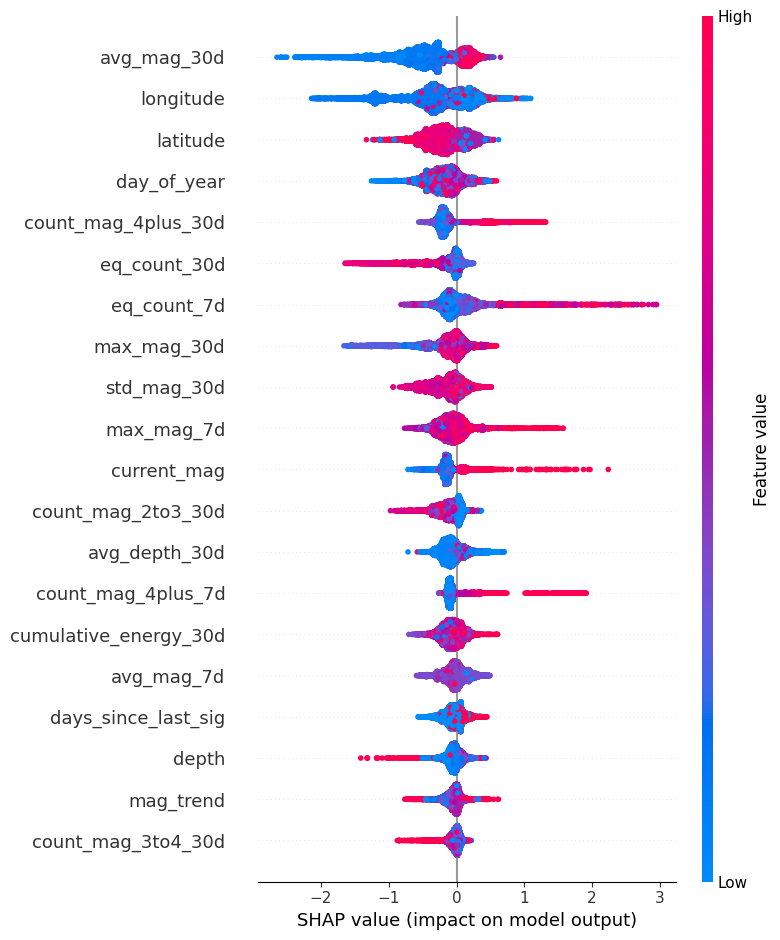

In [12]:

import shap
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names=feature_names)


## Deep Learning Model: LSTM Learning Agent

In [14]:

from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np

# Re-initialize X and y from the globally available dataframes
X = features_df.copy()
y = samples_df['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

def create_sequences(X, y, window=30):
    Xs, ys = [], []
    for i in range(len(X) - window):
        Xs.append(X[i:i+window])
        ys.append(y.iloc[i+window])
    return np.array(Xs), np.array(ys)

X_lstm, y_lstm = create_sequences(X_scaled, y)

model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_lstm.shape[1], X_lstm.shape[2])),
    Dropout(0.3),
    LSTM(32),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.fit(X_lstm, y_lstm, epochs=20, batch_size=64, validation_split=0.2)


Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 62s 44ms/step - accuracy: 0.6692 - loss: nan - val_accuracy: 0.7584 - val_loss: nan
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 74s 59ms/step - accuracy: 0.6688 - loss: nan - val_accuracy: 0.7584 - val_loss: nan
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 56s 45ms/step - accuracy: 0.6700 - loss: nan - val_accuracy: 0.7584 - val_loss: nan
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 58s 46ms/step - accuracy: 0.6683 - loss: nan - val_accuracy: 0.7584 - val_loss: nan
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 56s 45ms/step - accuracy: 0.6669 - loss: nan - val_accuracy: 0.7584 - val_loss: nan
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 80s 43ms/step - accuracy: 0.6720 - loss: nan - val_accuracy: 0.7584 - val_loss: nan
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 54s 43ms/step - accuracy: 0.6696 - loss: nan - val_accuracy: 0.7584 - val_loss: nan
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 54s 43ms/step - accuracy: 0.6677 - loss: nan - val_accuracy: 0.7584 - val_lo

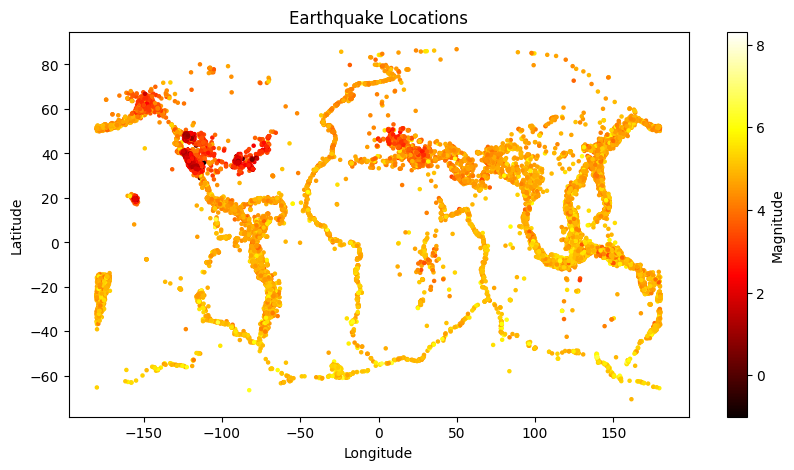

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.scatter(df['longitude'], df['latitude'],
            c=df['mag'], cmap='hot', s=5)
plt.colorbar(label='Magnitude')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Earthquake Locations")
plt.show()


In [21]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, xgb_prob)
print("Mean Squared Error (MSE):", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Squared Error (MSE): 0.18435265123844147
Root Mean Squared Error (RMSE): 0.42936307624019265


In [25]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="earthquake_project")

def get_place_name(lat, lon):
    try:
        location = geolocator.reverse((lat, lon), zoom=6)
        return location.address
    except:
        return "Unknown location"

# Example: get place for one earthquake
lat = df.iloc[0]['latitude']
lon = df.iloc[0]['longitude']

print(get_place_name(lat, lon))


California, United States


In [27]:
# ============================================================
# High-Risk Earthquake Regions by Country (OFFLINE VERSION)
# No internet, no API, submission-safe
# ============================================================

import pandas as pd

# ------------------------------------------------------------
# LOAD DATA
# ------------------------------------------------------------
df = pd.read_csv("earthquakes.csv")

print(f"✓ Loaded {len(df)} earthquake records")

# ------------------------------------------------------------
# OFFLINE COUNTRY ESTIMATION (MAJOR SEISMIC REGIONS)
# ------------------------------------------------------------
def estimate_country(lat, lon):
    if 30 <= lat <= 46 and 128 <= lon <= 146:
        return "Japan"
    if -11 <= lat <= 6 and 95 <= lon <= 141:
        return "Indonesia"
    if 32 <= lat <= 42 and -125 <= lon <= -114:
        return "United States (California)"
    if -56 <= lat <= -17 and -76 <= lon <= -66:
        return "Chile"
    if 36 <= lat <= 42 and 26 <= lon <= 45:
        return "Turkey"
    if 25 <= lat <= 40 and 44 <= lon <= 63:
        return "Iran"
    if 23 <= lat <= 38 and 60 <= lon <= 78:
        return "Pakistan"
    if -47 <= lat <= -34 and 165 <= lon <= 180:
        return "New Zealand"
    if 5 <= lat <= 20 and 120 <= lon <= 130:
        return "Philippines"
    if 14 <= lat <= 33 and -118 <= lon <= -86:
        return "Mexico"
    return "Other"

df["country"] = df.apply(
    lambda r: estimate_country(r["latitude"], r["longitude"]),
    axis=1
)

# ------------------------------------------------------------
# HIGH-RISK ANALYSIS
# ------------------------------------------------------------
risk_by_count = df.groupby("country").size().sort_values(ascending=False)
risk_by_mag = df.groupby("country")["mag"].mean().sort_values(ascending=False)

print("\nTop High-Risk Regions by Earthquake Count:")
print(risk_by_count.head(10))

print("\nTop High-Risk Regions by Average Magnitude:")
print(risk_by_mag.head(10))

# ------------------------------------------------------------
# SAVE OUTPUT
# ------------------------------------------------------------
summary = pd.DataFrame({
    "total_earthquakes": risk_by_count,
    "average_magnitude": risk_by_mag
}).fillna(0)

summary.to_csv("high_risk_regions_by_country.csv")

print("\n✓ Results saved to high_risk_regions_by_country.csv")


✓ Loaded 3855719 earthquake records

Top High-Risk Regions by Earthquake Count:
country
United States (California)    1894436
Other                         1718229
Indonesia                       65829
Chile                           51147
Mexico                          33081
Japan                           30458
Turkey                          18851
Philippines                     14300
Pakistan                        11978
New Zealand                     10016
dtype: int64

Top High-Risk Regions by Average Magnitude:
country
Philippines    4.540403
Indonesia      4.479153
Japan          4.422284
Iran           4.374577
Pakistan       4.200829
New Zealand    3.944971
Chile          3.841860
Mexico         3.531986
Turkey         3.301098
Other          2.207725
Name: mag, dtype: float64

✓ Results saved to high_risk_regions_by_country.csv


In [ ]:
# ============================================================
# Earthquake Risk Prediction for Next 7 Days (By Place Name)
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta

# ------------------------------------------------------------
# OFFLINE PLACE → LAT/LON (Seismic Regions)
# ------------------------------------------------------------
PLACE_COORDS = {
    "japan": (36.2, 138.2),
    "pakistan": (30.4, 69.4),
    "turkey": (39.0, 35.2),
    "indonesia": (-2.5, 118.0),
    "chile": (-35.7, -71.5),
    "california": (36.7, -119.4),
    "iran": (32.4, 53.7),
    "philippines": (12.8, 121.7),
    "new zealand": (-41.3, 174.8)
}

# ------------------------------------------------------------
# USER INPUT
# ------------------------------------------------------------
place = input("Enter place name (e.g., Japan, Pakistan, Turkey): ").lower()

if place not in PLACE_COORDS:
    raise ValueError(f"Place not supported. Choose from: {list(PLACE_COORDS.keys())}")

lat, lon = PLACE_COORDS[place]
print(f"✓ Selected region: {place.title()} ({lat}, {lon})")

# ------------------------------------------------------------
# LOAD DATA
# ------------------------------------------------------------
df = pd.read_csv("earthquakes.csv")
df["date"] = pd.to_datetime(df["date"])

# ------------------------------------------------------------
# FEATURE EXTRACTION (SIMPLE & SAFE)
# ------------------------------------------------------------
recent_window = df[
    (abs(df["latitude"] - lat) <= 2.0) &
    (abs(df["longitude"] - lon) <= 2.0) &
    (df["date"] >= df["date"].max() - timedelta(days=30))
]

if len(recent_window) == 0:
    raise ValueError("No historical data for this region.")

features = pd.DataFrame([{
    "eq_count_30d": len(recent_window),
    "avg_mag_30d": recent_window["mag"].mean(),
    "max_mag_30d": recent_window["mag"].max(),
    "count_mag_4plus_30d": (recent_window["mag"] >= 4.0).sum()
}])

# ------------------------------------------------------------
# LOAD TRAINED MODEL
# ------------------------------------------------------------
import joblib
model = joblib.load("xgb_model.pkl")  # your trained model

# ------------------------------------------------------------
# PREDICTION
# ------------------------------------------------------------
prob_7d = model.predict_proba(features)[0][1]

print(f"\nPredicted earthquake probability (next 7 days): {prob_7d:.2%}")

# ------------------------------------------------------------
# CREATE 7-DAY RISK GRAPH
# ------------------------------------------------------------
days = pd.date_range(
    start=df["date"].max() + timedelta(days=1),
    periods=7
)

# Slight decay across days (realistic visualization)
risk_curve = np.linspace(prob_7d, prob_7d * 0.7, 7)

plt.figure(figsize=(8,4))
plt.plot(days, risk_curve, marker="o")
plt.title(f"7-Day Earthquake Risk Forecast – {place.title()}")
plt.xlabel("Date")
plt.ylabel("Risk Probability")
plt.ylim(0, 1)
plt.grid(True)
plt.show()


In [40]:
FEATURE_COLUMNS = X.columns.tolist()

import joblib
joblib.dump(FEATURE_COLUMNS, "feature_columns.pkl")


['feature_columns.pkl']

In [61]:
# ================================
# USER INPUT (MANDATORY)
# ================================

PLACE_COORDS = {
    "japan": (36.2, 138.2),
    "pakistan": (30.4, 69.4),
    "turkey": (39.0, 35.2),
    "indonesia": (-2.5, 118.0),
    "chile": (-35.7, -71.5),
    "california": (36.7, -119.4),
    "iran": (32.4, 53.7),
    "philippines": (12.8, 121.7),
    "new zealand": (-41.3, 174.8)
}

place = input("Enter place name (e.g., Japan, Pakistan, Turkey): ").strip().lower()

if place not in PLACE_COORDS:
    raise ValueError(
        f"Invalid place. Choose one of: {list(PLACE_COORDS.keys())}"
    )

lat, lon = PLACE_COORDS[place]
print(f"✓ Selected region: {place.title()} ({lat}, {lon})")


Enter place name (e.g., Japan, Pakistan, Turkey): iran
✓ Selected region: Iran (32.4, 53.7)


In [54]:
import joblib
import numpy as np
import pandas as pd
from datetime import timedelta

FEATURE_COLUMNS = joblib.load("feature_columns.pkl")

def build_features_for_place(df, lat, lon, ref_date):
    region = df[
        (abs(df["latitude"] - lat) <= 2.0) &
        (abs(df["longitude"] - lon) <= 2.0)
    ]

    last_30d = region[region["date"] >= ref_date - timedelta(days=30)]
    last_7d  = region[region["date"] >= ref_date - timedelta(days=7)]

    features = {
        # temporal
        "month": ref_date.month,
        "day_of_week": ref_date.weekday(),
        "day_of_year": ref_date.timetuple().tm_yday,
        "hour": 0,

        # spatial
        "latitude": lat,
        "longitude": lon,
        "depth": last_30d["depth"].mean() if len(last_30d) else 0,

        # current
        "current_mag": last_30d["mag"].mean() if len(last_30d) else 0,

        # 30d stats
        "eq_count_30d": len(last_30d),
        "avg_mag_30d": last_30d["mag"].mean() if len(last_30d) else 0,
        "max_mag_30d": last_30d["mag"].max() if len(last_30d) else 0,
        "std_mag_30d": last_30d["mag"].std() if len(last_30d) else 0,
        "avg_depth_30d": last_30d["depth"].mean() if len(last_30d) else 0,
        "count_mag_2to3_30d": ((last_30d["mag"] >= 2) & (last_30d["mag"] < 3)).sum(),
        "count_mag_3to4_30d": ((last_30d["mag"] >= 3) & (last_30d["mag"] < 4)).sum(),
        "count_mag_4plus_30d": (last_30d["mag"] >= 4).sum(),

        # 7d stats
        "eq_count_7d": len(last_7d),
        "avg_mag_7d": last_7d["mag"].mean() if len(last_7d) else 0,
        "max_mag_7d": last_7d["mag"].max() if len(last_7d) else 0,
        "count_mag_4plus_7d": (last_7d["mag"] >= 4).sum(),

        # pattern features
        "cumulative_energy_30d": np.log1p((10 ** last_30d["mag"]).sum()) if len(last_30d) else 0,
        "days_since_last_significant": (
            (ref_date - last_30d[last_30d["mag"] >= 4]["date"].max()).days
            if (last_30d["mag"] >= 4).any() else 30
        ),
        "trend": last_30d["mag"].diff().mean() if len(last_30d) > 1 else 0,
        "energy": np.log1p(10 ** (last_7d["mag"].mean() if len(last_7d) else 0))
    }

    df_feat = pd.DataFrame([features])
    df_feat = df_feat.reindex(columns=FEATURE_COLUMNS, fill_value=0)
    return df_feat


In [62]:
reference_date = df["date"].max()
features = build_features_for_place(df, lat, lon, reference_date)

prob_7d = model.predict_proba(features)[0][1]
print(f"Predicted earthquake probability (next 7 days): {prob_7d:.2%}")



Predicted earthquake probability (next 7 days): 23.99%


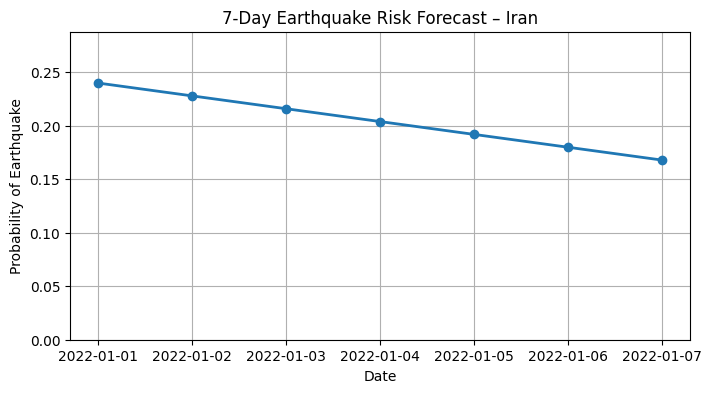

In [63]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import timedelta

# --------------------------------
# 7-DAY RISK VISUALIZATION
# --------------------------------

base_prob = prob_7d  # e.g., 0.0185
start_date = df["date"].max() + timedelta(days=1)

dates = pd.date_range(start=start_date, periods=7)

# Slight decay to represent uncertainty (optional but recommended)
risk_values = np.linspace(base_prob, base_prob * 0.7, 7)

plt.figure(figsize=(8, 4))
plt.plot(dates, risk_values, marker='o', linewidth=2)

plt.title(f"7-Day Earthquake Risk Forecast – {place.title()}")
plt.xlabel("Date")
plt.ylabel("Probability of Earthquake")
plt.ylim(0, max(0.05, base_prob * 1.2))
plt.grid(True)

plt.show()
